# NVIDIA Market Analytics: Clustering Analysis with K-Means and Elbow Method

In [80]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv(r"nvidia_market_analytics.csv")

In [82]:
df

,Date,Product Category,Product Name,Region,Units Sold,Customer Segment,Customer Type,Customer Satisfaction,Marketing Spend (USD),Discount Percentage (%),Competitor Influence,Return Rate (%),AI/ML Adoption Rate (%),Ad Campaign Effectiveness,Customer Retention Rate (%),Product Launch Date,Competitor Product,Market Share (%),Sales Revenue (USD)
0,2016-08-12,OEM,Tesla T4,Africa,3758.0,Gamers,Individual,1.9,155181.38,8,Low,1.33,12.0,0.22,63.0,2018-10-27,AMD Radeon RX 7900,62.62,3.107797e+08
1,1995-07-02,OEM,Tesla V100,Middle East,4978.0,Cloud Providers,Individual,4.2,136191.16,19,Medium,2.69,75.0,0.28,88.0,2021-07-22,AMD Radeon RX 7900,63.38,2.973832e+08
2,2019-05-08,AI,RTX 4090,Europe,1875.0,AI Researchers,Business,1.3,156854.40,10,Low,4.12,10.0,0.28,80.0,2017-04-18,AMD Radeon RX 7900,69.77,6.043866e+09
3,2008-06-26,OEM,RTX 3080,APAC,3551.0,Cloud Providers,Individual,3.8,79772.88,5,Low,4.69,43.0,0.13,72.0,2001-06-16,Intel Xeon,33.86,2.833449e+08
4,1996-07-17,Gaming,RTX 4090,Europe,1571.0,AI Researchers,Business,4.0,165636.07,15,Medium,0.58,48.0,0.12,63.0,2000-01-04,Google TPU,59.26,2.877546e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39293,1999-09-18,Data Center,Tesla V100,APAC,4162.0,Educational Institutions,Business,3.1,144004.38,17,Medium,3.23,24.0,0.09,70.0,1996-07-16,Intel Xeon,67.76,2.919598e+08
39294,2007-02-09,Gaming,RTX 4090,Middle East,4588.0,Cloud Providers,Individual,4.2,74360.89,10,Medium,1.18,37.0,0.27,84.0,1995-05-28,Intel Xeon,48.05,2.837566e+08
39295,2022-08-28,Gaming,RTX 4090,North America,2820.0,Educational Institutions,Business,3.2,94566.02,11,Medium,1.29,20.0,0.15,51.0,1994-07-22,Intel Xeon,44.33,1.662074e+11
39296,2000-11-23,AI,Tesla T4,Middle East,3671.0,Cloud Providers,Individual,2.9,42144.35,14,High,1.86,56.0,0.14,66.0,1999-06-05,Intel Xeon,34.56,3.009924e+08


In [83]:
df_numeric = df.select_dtypes(include=[float, int])

In [84]:
df_numeric = df_numeric.dropna()

In [85]:
df_numeric

,Units Sold,Customer Satisfaction,Marketing Spend (USD),Discount Percentage (%),Return Rate (%),AI/ML Adoption Rate (%),Ad Campaign Effectiveness,Customer Retention Rate (%),Market Share (%),Sales Revenue (USD)
0,3758.0,1.9,155181.38,8,1.33,12.0,0.22,63.0,62.62,3.107797e+08
1,4978.0,4.2,136191.16,19,2.69,75.0,0.28,88.0,63.38,2.973832e+08
2,1875.0,1.3,156854.40,10,4.12,10.0,0.28,80.0,69.77,6.043866e+09
3,3551.0,3.8,79772.88,5,4.69,43.0,0.13,72.0,33.86,2.833449e+08
4,1571.0,4.0,165636.07,15,0.58,48.0,0.12,63.0,59.26,2.877546e+08
...,...,...,...,...,...,...,...,...,...,...
39293,4162.0,3.1,144004.38,17,3.23,24.0,0.09,70.0,67.76,2.919598e+08
39294,4588.0,4.2,74360.89,10,1.18,37.0,0.27,84.0,48.05,2.837566e+08
39295,2820.0,3.2,94566.02,11,1.29,20.0,0.15,51.0,44.33,1.662074e+11
39296,3671.0,2.9,42144.35,14,1.86,56.0,0.14,66.0,34.56,3.009924e+08


In [86]:
samples = df_numeric.values

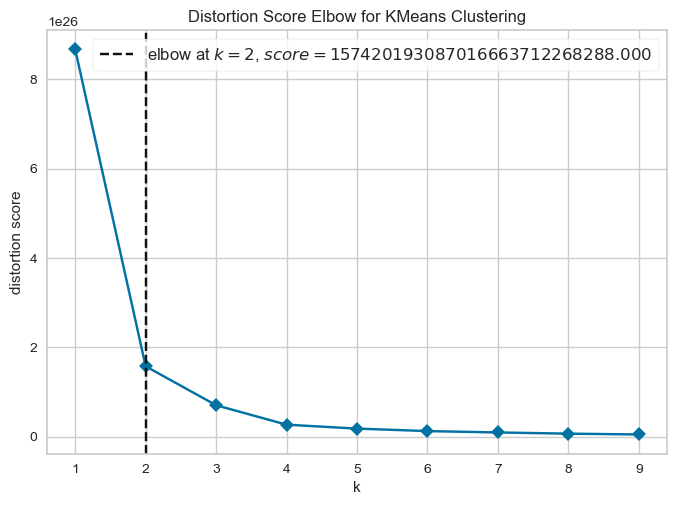

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1, 10), timings=False)
visualizer.fit(samples)
visualizer.show()

In [88]:
model2 = KMeans(n_clusters=3, max_iter=100, random_state=42)
clusters = model2.fit_predict(samples)

In [89]:
# Had to add this step as the lengths weren't matching due to removing null values
if len(clusters) == len(df_numeric):
    df['Cluster_Made'] = pd.Series(clusters, index=df_numeric.index)  # Ensure correct index alignment
else:
    print(f"Length of clusters: {len(clusters)}, Length of df_numeric: {len(df_numeric)}")

In [90]:
df['Cluster_Made'] = df['Cluster_Made'].replace([0, 1, 2], ['First Group', 'Second Group', 'Third Group'])
df['Cluster_Made']

0        First Group
1        First Group
2        First Group
3        First Group
4        First Group
            ...     
39293    First Group
39294    First Group
39295    First Group
39296    First Group
39297    First Group
Name: Cluster_Made, Length: 39298, dtype: object

In [91]:
group_counts = df['Cluster_Made'].value_counts()
group_counts

Cluster_Made
First Group     36591
Third Group      2051
Second Group      646
Name: count, dtype: int64